[Code source](https://github.com/RubensZimbres/Repo-2017/blob/master/t-SNE%20Dimensionality%20Reduction)
[More Python codes for DS](https://github.com/RubensZimbres/Repo-2017)

In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
# from matplotlib.colors import ListedColormap
from sklearn import manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.821183
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.777083
[t-SNE] Error after 125 iterations: 0.777083


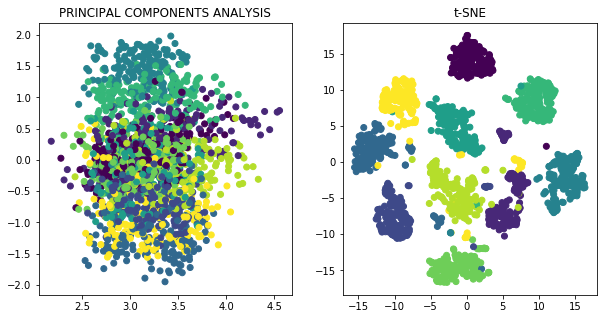

('ORIGINAL DATA DIMENSION:', (1797, 64))
('DIMENSIONS AFTER t-SNE', (1797, 2))


In [4]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

xx=[]
for i in range(0,len(X)):
    xx.append((X[i] - np.min(X)) / (np.max(X) - np.min(X)))
X=xx

pca=decomposition.TruncatedSVD(n_components=2)
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
pca2=pca.fit(X)
pca2.components_
pca3=pca2.transform(X)

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0,perplexity=50,verbose=1,n_iter=1500)
X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(10,5))
plt.subplot2grid((1,2), (0,0))
plt.title('PRINCIPAL COMPONENTS ANALYSIS')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target)
plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=2)
plt.title('t-SNE')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target)
plt.show()

## ORIGINAL DATA DIMENSIONS
print('ORIGINAL DATA DIMENSION:',np.array(X).shape)

## DIMENSIONS AFTER t-SNE
print('DIMENSIONS AFTER t-SNE',np.array(X_tsne).shape)

[More from the source](https://github.com/RubensZimbres/Repo-2017/blob/master/t-SNE%20PCA%20LDA%20embeddings)

In [ ]:
## Adapted from: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

Computing random projection
Computing PCA projection
Computing Linear Discriminant Analysis projection
Computing Isomap embedding
Done.
Computing Totally Random Trees embedding
Computing t-SNE embedding


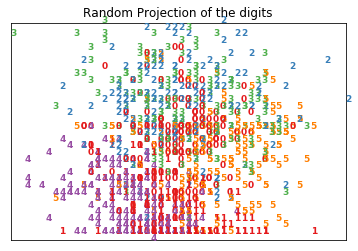

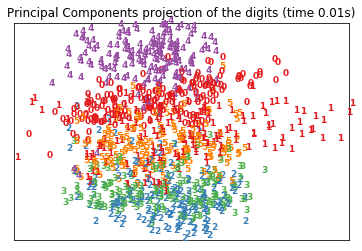

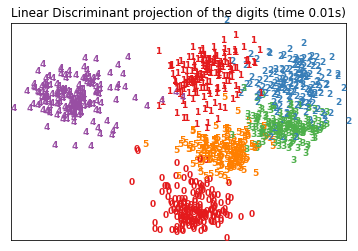

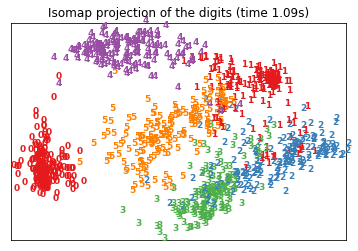

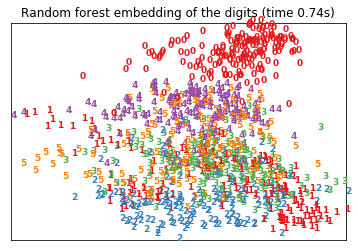

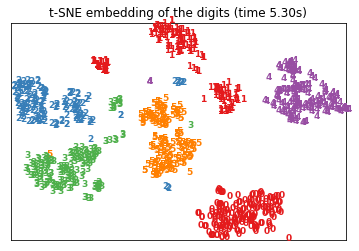

In [3]:
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))


print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))

print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()